In [44]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.precision', 3)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 25)

In [45]:
excel_file_path = '../data/090120_Results_091020.xlsx'
results_data = pd.read_excel(excel_file_path)
results_data.head()

,,Label,Area,Mean,Perim.,IntDen,Median,%Area,RawIntDen
0,1,TGFb2_1.tif:0:c:2/2 z:1/18 - TGFb2_1,3.872,225.655,10.954,873.668,255,100.0,26853.0
1,2,TGFb2_1.tif:1:c:2/2 z:1/18 - TGFb2_1,16.072,162.674,17.560,2614.562,163,100.0,80361.0
2,3,TGFb2_1.tif:2:c:2/2 z:1/18 - TGFb2_1,151.744,128.366,106.297,19478.763,118,100.0,598698.0
3,4,TGFb2_1.tif:3:c:2/2 z:1/18 - TGFb2_1,10.444,131.928,18.413,1377.833,128,100.0,42349.0
4,5,TGFb2_1.tif:4:c:2/2 z:1/18 - TGFb2_1,0.455,150.857,4.161,68.714,153,100.0,2112.0


In [46]:
# dropping null value columns to avoid errors
results_data.dropna(inplace = True)
results_data.shape

(10489, 9)

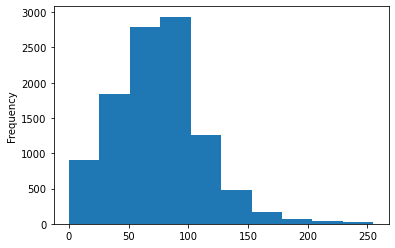

In [47]:
results_sorted = results_data.sort_values(['Label'], ascending=False)
# results_sorted['Count'].head(10).plot(kind='barh')
results_sorted['Mean'].plot(kind='hist')
plt.show()

In [48]:
results_data.describe()


,,Area,Mean,Perim.,IntDen,Median,%Area,RawIntDen
count,10489.000,10489.000,10489.000,10489.000,10489.000,10489.000,10489.000,1.049e+04
mean,5245.000,60.037,74.819,26.702,5432.864,70.669,95.875,1.670e+05
std,3028.058,241.338,37.021,73.170,19313.931,37.300,14.501,5.936e+05
min,1.000,0.033,0.000,0.510,0.000,0.000,0.000,0.000e+00
25%,2623.000,0.065,49.542,1.020,4.718,47.000,99.829,1.450e+02
50%,5245.000,2.733,74.000,8.287,188.932,68.000,100.000,5.807e+03
75%,7867.000,46.721,95.731,32.946,3768.716,88.000,100.000,1.158e+05
max,10489.000,10122.613,255.000,2837.893,693928.761,255.000,100.000,2.133e+07


In [49]:
split_label = results_data['Label'].str.split(":", expand=True)
split_label.columns = ['id', 'count', 'channel', 'z', 'ordinal']
split_label['id'] = split_label['id'].str.replace('C1-','').str.replace('C2-','').str.replace('.tiff','').str.replace('.tif','').str.replace('_Mito', '')
split_label.head()

,id,count,channel,z,ordinal
0,TGFb2_1,0,c,2/2 z,1/18 - TGFb2_1
1,TGFb2_1,1,c,2/2 z,1/18 - TGFb2_1
2,TGFb2_1,2,c,2/2 z,1/18 - TGFb2_1
3,TGFb2_1,3,c,2/2 z,1/18 - TGFb2_1
4,TGFb2_1,4,c,2/2 z,1/18 - TGFb2_1


In [50]:
condition_label = split_label['id'].str.split("_", expand=True)
condition_label.columns = ['condition', 'replicate']
condition_label.head()

,condition,replicate
0,TGFb2,1
1,TGFb2,1
2,TGFb2,1
3,TGFb2,1
4,TGFb2,1


In [51]:
results_data['id'] = split_label['id']
results_data['ordinal'] = split_label['ordinal']
results_data.head()

,,Label,Area,Mean,Perim.,IntDen,Median,%Area,RawIntDen,id,ordinal
0,1,TGFb2_1.tif:0:c:2/2 z:1/18 - TGFb2_1,3.872,225.655,10.954,873.668,255,100.0,26853.0,TGFb2_1,1/18 - TGFb2_1
1,2,TGFb2_1.tif:1:c:2/2 z:1/18 - TGFb2_1,16.072,162.674,17.560,2614.562,163,100.0,80361.0,TGFb2_1,1/18 - TGFb2_1
2,3,TGFb2_1.tif:2:c:2/2 z:1/18 - TGFb2_1,151.744,128.366,106.297,19478.763,118,100.0,598698.0,TGFb2_1,1/18 - TGFb2_1
3,4,TGFb2_1.tif:3:c:2/2 z:1/18 - TGFb2_1,10.444,131.928,18.413,1377.833,128,100.0,42349.0,TGFb2_1,1/18 - TGFb2_1
4,5,TGFb2_1.tif:4:c:2/2 z:1/18 - TGFb2_1,0.455,150.857,4.161,68.714,153,100.0,2112.0,TGFb2_1,1/18 - TGFb2_1


In [52]:
results_data['condition'] = condition_label['condition']
results_data['replicate'] = condition_label['replicate']
results_data.head()

,,Label,Area,Mean,Perim.,IntDen,Median,%Area,RawIntDen,id,ordinal,condition,replicate
0,1,TGFb2_1.tif:0:c:2/2 z:1/18 - TGFb2_1,3.872,225.655,10.954,873.668,255,100.0,26853.0,TGFb2_1,1/18 - TGFb2_1,TGFb2,1
1,2,TGFb2_1.tif:1:c:2/2 z:1/18 - TGFb2_1,16.072,162.674,17.560,2614.562,163,100.0,80361.0,TGFb2_1,1/18 - TGFb2_1,TGFb2,1
2,3,TGFb2_1.tif:2:c:2/2 z:1/18 - TGFb2_1,151.744,128.366,106.297,19478.763,118,100.0,598698.0,TGFb2_1,1/18 - TGFb2_1,TGFb2,1
3,4,TGFb2_1.tif:3:c:2/2 z:1/18 - TGFb2_1,10.444,131.928,18.413,1377.833,128,100.0,42349.0,TGFb2_1,1/18 - TGFb2_1,TGFb2,1
4,5,TGFb2_1.tif:4:c:2/2 z:1/18 - TGFb2_1,0.455,150.857,4.161,68.714,153,100.0,2112.0,TGFb2_1,1/18 - TGFb2_1,TGFb2,1


In [53]:
new_column_order = ['id', 'ordinal', 'Mean', 'Label', 'condition', 'replicate']
results_data = results_data[new_column_order]
results_data.rename(columns={'Count': 'nuclei_count', 'Label': 'description'}, inplace=True)
results_data = results_data[results_data['Mean']!=0]

In [54]:
results_data.groupby('id')['Mean'].sum()

id
Con_1      38721.041
Con_2      22135.345
Con_3      18292.624
Con_4      19958.589
Con_5      32686.830
Con_6      21672.220
NaIO3_1    22390.660
NaIO3_2    27200.905
NaIO3_3    39981.678
NaIO3_4    47205.196
NaIO3_5    39506.457
NaIO3_6    38313.389
TGFb2_1    14137.461
TGFb2_2    15261.119
TGFb2_3    35957.652
TGFb2_4    18159.547
TGFb2_5    52939.677
TGFb2_6    47888.796
TNFa_1     21583.650
TNFa_2     36650.793
TNFa_3     57554.183
TNFa_4     41062.523
TNFa_5     38269.401
TNFa_6     37251.942
Name: Mean, dtype: float64

In [55]:
results_fluoro_id_means = results_data.groupby('id')['Mean'].mean()
results_fluoro_id_means

id
Con_1       77.910
Con_2       74.280
Con_3       87.108
Con_4       71.793
Con_5       83.173
Con_6       45.150
NaIO3_1    105.120
NaIO3_2     95.442
NaIO3_3     91.282
NaIO3_4     92.018
NaIO3_5     95.196
NaIO3_6     91.440
TGFb2_1    109.593
TGFb2_2     98.459
TGFb2_3     81.908
TGFb2_4     55.876
TGFb2_5     71.251
TGFb2_6     64.715
TNFa_1      85.311
TNFa_2      69.944
TNFa_3      61.424
TNFa_4      68.781
TNFa_5      67.733
TNFa_6      73.913
Name: Mean, dtype: float64

In [56]:
result_fluoro_condition_means = results_data.groupby('condition')['Mean'].mean()
result_fluoro_condition_means

condition
Con      71.181
NaIO3    93.998
TGFb2    72.835
TNFa     68.749
Name: Mean, dtype: float64

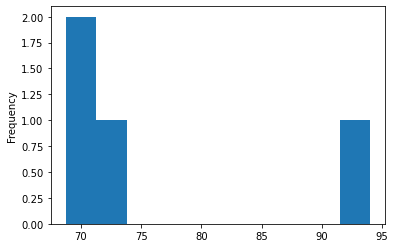

In [57]:
results_data.groupby('condition')['Mean'].mean().plot(kind='hist')
plt.show()

In [58]:
results_data.groupby('condition')['Mean'].mean()[1]


93.99837295398547

In [59]:
from openpyxl import load_workbook

book = load_workbook(excel_file_path)
excel_writer = pd.ExcelWriter(excel_file_path, engine='openpyxl')
excel_writer.book = book

results_data.to_excel(excel_writer, sheet_name= 'Data_Results')
results_fluoro_id_means.to_excel(excel_writer, sheet_name= 'Fluoro_Id_Means')
result_fluoro_condition_means.to_excel(excel_writer, sheet_name= 'Fluoro_Condition_Means')
excel_writer.save()
excel_writer.close()